## Webbrowser and Request Modules - demo

In [ ]:
# Importing modules
import webbrowser
import requests

In [ ]:
# -- here is how to open an URL using webbrowser module
print(webbrowser.open('http://www.cityu.edu'))
# -- now we can extract some content/text from the webpage
print(webbrowser.open('https://w3schools.com/python/'))
print(webbrowser.open('https://w3schools.com/python/demopage.htm'))

The Hypertext Transfer Protocol (HTTP) is designed to enable communications between clients and servers.
HTTP works as a request-response protocol between a client and server.
Example: A client (browser) sends an HTTP request to the server; then the server returns a response to the client. The response contains status information about the request and may also contain the requested content.
HTTP Methods
    GET
    POST
    PUT
    HEAD
    DELETE
    PATCH

**The GET Method**

GET is used to request data from a specified resource.
GET is one of the most common HTTP methods.
Note that the query string (name/value pairs) is sent in the URL of a GET request:
/test/demo_form.php?name1=value1&name2=value2
= cached, stays in the browser history

**The POST Method **

POST is used to send data to a server to create/update a resource, for instance, user=, password
The data sent to the server with POST is stored in the request body of the HTTP request:

 = not cached, doesn't persiste in the browser

 -- getting the html property


In [ ]:
res = requests.get('https://w3schools.com/python/demopage.htm')
print(res.content) # content writting in bytes

In [ ]:
print(res.text) # content writting in unicode UTF-8

In [ ]:
# -- getting the json property
res = requests.get('https://www.w3schools.com/python/demopage.js')
print(res.json())
print(res.text)
print(type(res.json()))
print(type(res.text))


In [ ]:
res.json()["firstname"]

In [ ]:
# -- let's try to make a request of an image, then store it into content attribute and finally save it to our disk.
robj = requests.get("https://www.python.org/static/img/python-logo.png")

In [ ]:
# Now let us write in file
with open("python-logo.png", 'wb') as fp:
    fp.write(robj.content)      # note content is raw data in bytes

In [ ]:
# Another way to write is using iter_content for big files
# iter_content writes chunk by chunk with given size
tempFile = open('python_temp1.png', 'wb')
for chunk in robj.iter_content(100000):
    tempFile.write(chunk)
tempFile.close()

Let us play with httpbin.org, which is A simple HTTP Request & Response Service.

In [ ]:
# -- There are several different methods in HTTP connection, GET, POST
# When HTTP is used, as is most common, the operations (HTTP methods) available are GET, HEAD, POST, PUT, PATCH, DELETE, CONNECT, OPTIONS and TRACE.
# request the text of the webpage
url = 'https://httpbin.org/get'
robj = requests.get(url)
print(robj.text)

In [ ]:
#
# -- now let's create a url with query string GET defined in dictionary, key=value pair
#
url1 = 'https://www.tennis-warehouse.com/searchresults.html'
payload = {'search': 'products', 'searchtext': 'prince'}
robj = requests.get(url1, params=payload) # payload = url parameter set

In [ ]:
robj.text

In [ ]:
#https://www.tennis-warehouse.com/searchresults.html?search=products&searchtext=head&opt_page=1&opt_sort=alphaAtoZ
# https://en.wikipedia.org/wiki/Query_string
# The series of pairs is separated by the ampersand
webbrowser.open_new(robj.url)

In [ ]:
print(robj.url)

In [ ]:
print(robj.headers)

In [ ]:
print(robj.content)
print(robj.text)

In [ ]:
print(dir(robj)) # dir shows attributes of the given object


In [ ]:
print("status = " + str(robj.status_code)) # 200 = Success, 400 = Not Found, 500 = Server not responding

In [ ]:
if(robj.status_code == 200):
    print("Success")
else:
    print("Not Found!")
print(robj.ok)

In [ ]:
# -- here is the POST request and let's see what it does
# POST request puts those payload dictionary data into a form expecting the
# HTTP will upload or update the display according to the data provided into the form key:value pair.
# check the URL and it doesn't have the payload information but shows up in the field of form.
url = 'https://httpbin.org/post'

In [ ]:
payload = {"username": "Jin", "password": "hello123", "platform": "Windows"}
robj = requests.post(url, data=payload) # payload = url parameter set
print(robj.text)

In [ ]:
print(robj.json()) # essentially returns the dictionary format of the contents

In [ ]:
robj_dict = robj.json()
print(robj_dict["url"])

In [ ]:
print(robj_dict["form"])


In [ ]:
print(robj_dict["origin"])

In [ ]:
# Posting to a website.
url = 'https://jsonplaceholder.typicode.com/posts'

In [ ]:
data = {'title':'Python Requests Post Testing','body':'I love Python','userId':'jin.chang@gmail.com'}
response = requests.post(url, data)
print(response.status_code)
print(response.text)

In [ ]:
# OPTIONAL
# -- one more example of authentication using get on the httpbin.org's Auth parameter
# document for auth in requests = https://requests.readthedocs.io/en/master/user/authentication/
# requests.get('https://api.github.com/user', auth=('user', 'pass'))
# <Response [200]>
# first go to https://httpbin.org/ and under Auth, register with user id and password
url = "https://httpbin.org/basic-auth/Jin/hello12"
robj = requests.get(url, auth=('Jin', 'hello12'))
print(robj.text)
print(robj.status_code) # 200 = Success, 401 = Unsuccessful

In [ ]:
url = 'https://jsonplaceholder.typicode.com/todos/1'
# The status code 200 means a successful execution of request and response.content will return the actual JSON response of a TODO item.

robj = requests.get(url)
print(robj.status_code)
print(robj.text)

In [ ]:
robj.raise_for_status()   # Good way to ensure program successfully called the given url

In [ ]:
# LEt us call non-existant url
res = requests.get('https://inventwithpython.com/page_that_does_not_exist')
try:
    res.raise_for_status()
except Exception as exc:
    print('There was a problem: %s' % (exc))

# Webscrapping demo - Parsing using bs4 Module
This is hust an highlevel overview of beautifulsoup module introduction. If you are interested to gain full knowledge, Visit https://www.crummy.com/software/BeautifulSoup/bs4/doc/
There is anothe framework named scrapy, which is similar to BeautifulSoup. If you are interested, visit https://docs.scrapy.org/en/latest/

In [ ]:
# Import module bs4. beautiful soup's module name is bs4
from bs4 import BeautifulSoup
# note we are not importing entire module. We are importing only one class from module bs4

In [ ]:
# Note lxml parser is not available by default. It requires installation
#!pip install --user lxml    # in windows
#! sudo apt-get install python3-lxml # in ubuntu linux

with open('example.html') as html_file:
    soup = BeautifulSoup(html_file, 'lxml') # lxml is a parser

In [ ]:
html1 = requests.get("https://www.geeksforgeeks.org/data-structures/")
soup = BeautifulSoup(html1.text, 'lxml')

In [ ]:
print(soup) # this prints the entire object

In [ ]:
print(dir(soup)) # display all attributes of soup

In [ ]:
print(soup.prettify())

In [ ]:
# -- print each HTML tag information
match = soup.title #title vs title.text tag
print(soup.title)

In [ ]:
# -- print only the textual information within each tag inner most
print(soup.title.text)

In [ ]:
print(soup.p)

In [ ]:
print(soup.strong)

In [ ]:
print(soup.p.text)

In [ ]:
# -- print only the textual information within each tag inner most
print(soup.p.text)



In [ ]:
print(soup.body)

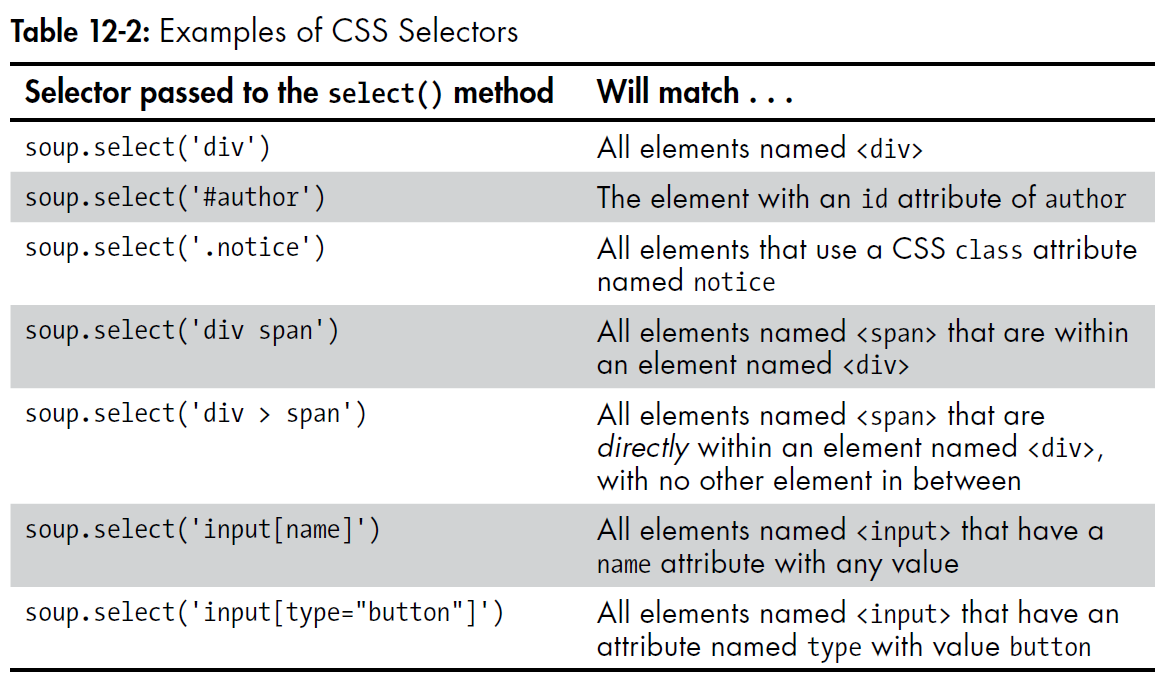![image.png](attachment:image.png)

In [ ]:
print(soup.body.text)

let's look at the div tag (child tags)
The div tag is known as Division tag. The div tag is used in HTML to make divisions of content in the web page like (text, images, header, footer, navigation bar, etc).

```
 Div tag has both open(<div>) and closing (</div>) tag and it is mandatory to close the tag. The Div is the most usable tag in web development because it helps us to separate out data in the web page and we can create a particular section for particular data or function in the web pages.

 The <div> tag defines a division or a section in an HTML document.
The <div> tag is used as a container for HTML elements - which is then styled with CSS or manipulated with JavaScript.
```




In [ ]:
div_elem = soup.div
type(div_elem)

In [ ]:
print(soup.div)


In [ ]:
# WE know div_elem is a tag.
div_elem.attrs   # we can get all attributes in the given tag object

In [ ]:
soup.select('div')   # You can select individual div sections as it returns list object. Try with index[]

In [ ]:
len(soup.select('div'))

In [ ]:
# --  prints the first instance, and so what we need to do is to actually find
#    a particular tag string that matches using find() method.
# -- Let's find the footer which as a different class name.
target = soup.find('div', class_ = '3D"i18n-overlay__selectors"') # find the tag with matching class attributes
print(target)

In [ ]:
article = soup.find('div', class_ = '3D"i18n-overlay__selectors"')
print(article)

In [ ]:
print(article.h2)

In [ ]:
print(article.h2.a)

In [ ]:
print(article.h2.a.text)

In [ ]:
# -- What if I want to print "summary"?
# -- Can you figure out?
summary = article.p.text
print(summary)

In [ ]:
# -- What if you like to extract only the HTML files that are assigned under href?
soup.findAll('a')

In [ ]:
# [<a href="article_1.html">Module 8: Web Scrapping</a>,
#  <a href="article_2.html">Module 9: Image Manipulation</a>,
#  <a href="article_1.html">Module 10: Data Visualization</a>]
for href in soup.findAll('a'):
    print(href.get('href')) # get the value assigned to href

In [ ]:
# -- Ok, now what if I want to print all the class' information?
print(soup.findAll('div', class_ = 'article')) # find all articles in a "LIST" format

In [ ]:
# -- this means I can loop thru the list.
for a in soup.findAll('div', class_ = 'article'): # find all articles
    print(a)
    print("---------")

In [ ]:
articles = soup.findAll('div', class_ = 'article') # find all articles
for article in articles:
    heading = article.h2.a.text
    print(heading)
    summary = article.p.text
    print(summary)
    print("-----------")

# Let us write the extracted article details in Excel

In [ ]:
import pdb
import csv
# If module is not available import it using below command
#!pip install openpyxl
from openpyxl import Workbook
from openpyxl.utils import get_column_letter

In [ ]:
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font, Color, Alignment, Border, Side, colors

In [ ]:
wb = Workbook()
ws = wb.active # select the active worksheet
#create excel type item

In [ ]:
soup.find_all('a')

In [ ]:
#articles = soup.find_all('a', class_ = 'exp-card*') # find all articles
articles = soup.find_all('a') # find all hyperlinks
row = 1
col = 1

In [ ]:
for article in articles:
    heading = article.text
    print(heading)
    ws.cell(row, col).font = Font(bold=True)
    ws.cell(row, col).font = Font(bold=True, color=colors.BLUE, size=20)
    ws.cell(row, col).value = article.href
    summary = article.text
    print(summary)
    row = row + 1
    ws.cell(row, col).font = Font(size=16)
    ws.cell(row, col).value = summary
    print("-----------")
    row = row + 1

wb.save("/content/final.xlsx")

# Optional Demo - Extracting all jobs from https://realpython.github.io/fake-jobs/

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="ResultsContainer")
job_cards = results.find_all("div", class_="card-content")


In [ ]:
job_cards

In [ ]:
for job_card in job_cards:
  title_element = job_card.find("h2", class_="title")
  company_element = job_card.find("h3", class_="company")
  location_element = job_card.find("p", class_="location")
  print(title_element.text.strip())
  print(company_element.text.strip())
  print(location_element.text.strip())
  print()

# Controlling web browser

Refer documentation https://selenium-python.readthedocs.io/

In [ ]:
!pip install selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome()

In [ ]:
driver.get("https://www.python.org")

In [ ]:
print(driver.title)

If you open page source from developer tools, we can find below code

```
<input id="id-search-field" name="q" type="search" role="textbox" class="search-field" placeholder="Search" value="" tabindex="1">
```

WE can use method find_element_by_name with element name as argument. As this is text box, we can enter data using the method send_keys.



In [ ]:
# Find the search bar using its name attribute
search_bar = driver.find_element(By.NAME,"q")

search_bar.clear()

search_bar.send_keys("getting started with python")



In [ ]:
search_bar.send_keys(Keys.RETURN)

In [ ]:
try:
    driver.close()
except Exception as e:
    print("Some error occured")

#Working with Excel like workbooks

Excel document is also called as workbook. Each workbook contains worksheets or sheets.
Sheets are named and they contain rows and columns.
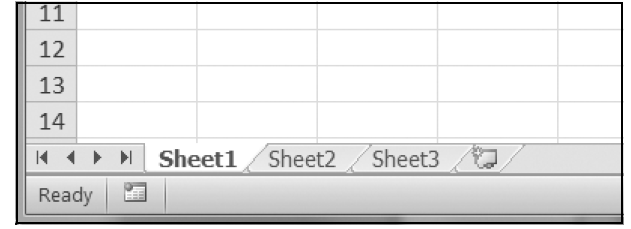

In [ ]:
import openpyxl # A Python library to read/write Excel 2010 xlsx/xlsm files
# workbook is the entire excel file (is the container for all parts of the
# document such another  worksheets

In [ ]:
import pandas as pd
x = pd.read_excel('Example.xlsx', header = None)

In [ ]:
x

In [ ]:
wb = openpyxl.load_workbook('Example.xlsx')
wb.sheetnames # returns a list of worksheets

In [ ]:
sheet = wb['Sheet1'] # to access a worksheets
print("Maximum no of rows : ", sheet.max_row)
print("Maximum no of columns : ",sheet.max_column)
print("Title of the sheet is ", sheet.title)

In [ ]:
# go and change the active sheet and press save button
# and try different sheets and verify active_sheet is stored.
active_sheet = wb.active # use the property for the active sheet
active_sheet

In [ ]:
'''
Cell Access
*A*
1. using Column Letter + Row Number (A1 ...) via active sheet
2. use a property called 'value' to read and write
'''
print(sheet['A1'])
print(sheet['A1'].value)
print(sheet['B1'])
print(sheet['C1'].value)

In [ ]:
'''
*B*
1. using row and column numbers .cell(row, column)
2. Don't use get_highest_row()/column(), but use the property (max_row, max_column) to find the laregest
'''
print(sheet.max_row, " ", sheet.max_column) # not get_highest_row(), not get_highest_column()
print(sheet.cell(2,2).value) # 1st index, not 0th index

In [ ]:
#'Row 1, Column 2 is Apples'
for i in range(1, sheet.max_row + 1): # 1st index, not 0th index
    print(i, sheet.cell(row = i, column = 2).value)
    # print(i, sheet.cell(row = i, column = 2).value, sheet.cell(row = i, column = 3).value)

In [ ]:
for i in range(1, sheet.max_row + 1): # 1st index, not 0th index
    for j in range(1, sheet.max_column + 1): # 1st index, not 0th index
        print(i, sheet.cell(row = i, column = j).value, end=",")
    print("\n")
    # print(i, sheet.cell(row = i, column = 2).value, sheet.cell(row = i, column = 3).value)

In [ ]:
# -- Different ways to get an index (numeric) from the column letters or vice versa
from openpyxl.utils.cell import get_column_letter, column_index_from_string, coordinate_from_string
# not from openpyxl.cell import get_column_letter, column_index_from_string

In [ ]:
get_column_letter(234)


In [ ]:
column_index_from_string('A')


In [ ]:
column_index_from_string('DKD')


In [ ]:
x, y = coordinate_from_string('A4') # returns ('A',4)
col = column_index_from_string(x) # returns 1
row = y
print(x, y, col, row)

In [ ]:
# -- You also can slice Worksheet objects to get all the Cell objects in a row, column, or
#     rectangular area of the spreadsheet.
#     Then you can loop over all the cells in the slice.
gen_obj = tuple(sheet['A1':'C3'])
print(gen_obj[0][0].value)
print(gen_obj[0][1].value)
print(gen_obj[0][2].value)

In [ ]:
# -- now they are 0th index since they are now stored in a tuple
  # A1 Hello World!
        # B1 Apples
        # C1 73
        # A2 2015-04-05 03:41:23
        # B2 Hello Jungle
        # C2 85
        # A3 2015-04-06 12:46:51
        # B3 Pears
        # C3 14


In [ ]:
for range_of_objs in sheet['A1':'C3']: # set the range of the data block
    for cell_obj in range_of_objs: # reading one row at a time and store it into a tuple
        print(cell_obj.coordinate, cell_obj.value)

In [ ]:
# You can use a generator (a type of iterator) using .iter_rows by providing the range
for value in sheet.iter_rows(min_row=2,max_row=5,min_col=2,max_col=5,values_only=True):
    print(value)

In [ ]:
# -- Finally, here is how to write the results to a file.
#  -- Here is how to change the title of each sheet
wb = openpyxl.load_workbook('Example.xlsx')
wb.sheetnames


In [ ]:
wb.create_sheet()
wb.create_sheet(index = 0, title='Page 1')
wb.create_sheet(index = 0, title='Page 2')
wb.create_sheet(index = 0, title='Page 2')


In [ ]:
wb.save('example3.xlsx')

In [ ]:
# accessing each worksheet
sheet = wb['Sheet1']
sheet = wb[wb.sheetnames[0]]
sheet = wb[wb.sheetnames[1]]
sheet = wb[wb.sheetnames[2]]


In [ ]:
sheet.title


In [ ]:
sheet.title = "Page1"
sheet.title

In [ ]:
wb.sheetnames

In [ ]:
# Let's write some values
sheet['A1'] = 'Hello World!' # A1, B2 ==> []
sheet['A1'].value
sheet.cell(2, 2).value = 'Hello Jungle' # (1, 2) ==> ()
sheet.cell(2, 2).value
wb.save('example2.xlsx')


In [ ]:
# Creating create_sheet().
# Note we still working with same object opened from example.com
wb.create_sheet()
wb.create_sheet(index = 0, title='Page 1')
wb.save('example3.xlsx')



In [ ]:
# Removing sheets using wb.remove_sheet()
wb.remove(wb['Sheet1'])
wb.save('example3.xlsx')

In [ ]:
del wb['Page1']
wb.save('example3.xlsx')

## In-Class Exercises

# Challenge 1 - Fill vlaues like below in excel sheet1
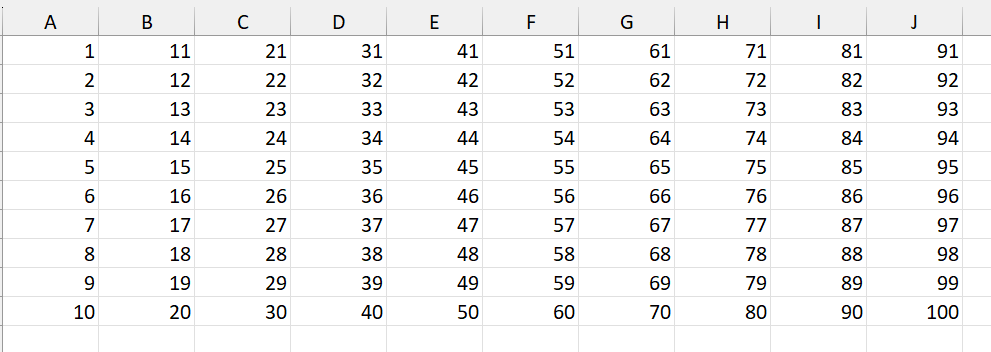

# Challenge 2 - Web scrapping

Extract job information from the url https://realpython.github.io/fake-jobs/ to Excel sheet2 in the below format. Use Same Excel File.

| **Job**          | **Location**         | **Posted Date**                |
| :-----------: | :--------------: | :-------------------------: |
| Senior Python Developer | Stewartbury, AA |2021-04-08 |
| Energy engineer | Christopherville, AA |2021-04-08 |

<center> <b> or </b> </center>

Extract Top 250 Movies informaton from the url https://www.imdb.com/chart/top/?ref_=nv_mv_250 to Excel Sheet3 in the below format.

| **Title** | **Rank** | **Rating** | Release Year |
| :-------: | :------: | :-------:  | :----------: |
| The Shawshank Redemption | 1 |9.3 | 1994|
| The Godfather | 2 |9.2 |1972|





In [ ]:
# Challenge 1 - Solution
from openpyxl import Workbook
from openpyxl.utils import get_column_letter

#create excel type item
wb = Workbook()
# select the active worksheet
ws = wb.active

counter = 0
# row index incremented by 1 for row
# col index incremented by 1 for col.
# increment the counter
# counter += 1
# ws[] = counter
for column in range(1,11):
    column_letter = get_column_letter(column)
    for row in range(1,11):
        counter = counter +1
        ws[column_letter + str(row)] = counter

# values incrementing by 1 by column (Challenge in class)
# for row in range(1,11):
#     for column in range(1,6):
#         column_letter = get_column_letter(column)
#         counter = counter +1
#         ws[column_letter + str(row)] = counter

wb.save("challenge.xlsx")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import Font
from lxml import etree

# Part 1: Web Scraping
url = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
headers = {"User-Agent": "Chrome/132.0.0.0"}
response = requests.get(url, headers=headers)
with open("sample.html","w") as f:
  f.write(response.text)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# Find all movie elements using the relevant class names
movie_elements = soup.find_all('li', class_='ipc-metadata-list-summary-item')
#__next > main > div > div.ipc-page-content-container.ipc-page-content-container--center > section > div > div.ipc-page-grid.ipc-page-grid--bias-left > div > ul > li:nth-child(1)
#__next > main > div > div.ipc-page-content-container.ipc-page-content-container--center > section > div > div.ipc-page-grid.ipc-page-grid--bias-left > div > ul > li:nth-child(1)

In [ ]:
movie_elements_selector = soup.select("#__next > main > div > div.ipc-page-content-container.ipc-page-content-container--center > section > div > div.ipc-page-grid.ipc-page-grid--bias-left > div > ul > li")

In [ ]:
len(movie_elements_selector)

In [ ]:
len(movie_elements)

In [ ]:
# Initialize a list to store extracted movie data
movies_data = []

# Extract details for each movie
for movie in movie_elements:
    try:
        # Title
        title_element = movie.find('h3', class_='ipc-title__text')
        title = title_element.get_text(strip=True) if title_element else None

        # Year
        year_element = movie.find('span', class_='sc-d5ea4b9d-7 URyjV cli-title-metadata-item')
        year = year_element.get_text(strip=True) if year_element else None

        # Duration
        duration_elements = movie.find_all('span', class_='sc-d5ea4b9d-7 URyjV cli-title-metadata-item')
        duration = duration_elements[1].get_text(strip=True) if len(duration_elements) > 1 else None

        # Rating
        rating_element = movie.find('span', class_='ipc-rating-star--rating')
        rating = rating_element.get_text(strip=True) if rating_element else None

        # Votes
        votes_element = movie.find('span', class_='ipc-rating-star--voteCount')
        votes = votes_element.get_text(strip=True) if votes_element else None

        # Store the data
        movies_data.append({
            'Title': title,
            'Year': year,
            'Duration': duration,
            'Rating': rating,
            'Votes': votes
        })
    except Exception as e:
        print(f"An error occurred while parsing a movie: {e}")

# Print extracted data
for movie in movies_data:
    print(movie)

In [ ]:

# Create an Excel workbook and worksheet
workbook = Workbook()
sheet = workbook.active
sheet.title = "IMDb Top 250 Movies"

# Add headers to the Excel sheet
headers = ["Rank", "Title", "Year", "Duration", "Rating", "Votes"]
sheet.append(headers)

# Write movie data to the Excel sheet
for movie in movies_data:
    rank, Title = movie['Title'].split('.')
    sheet.append([rank, Title, movie['Year'], movie['Duration'], movie['Rating'], movie['Votes']])
    #print(movie)

# Save the workbook to an Excel file
output_file = "IMDb_Top_250_Movies_Openpyxl.xlsx"
workbook.save(output_file)

print(f"Data has been successfully saved to {output_file}.")

# Fossil CO2 emissions in USA
We will download data from https://www.worldometers.info/co2-emissions/us-co2-emissions/ and do some analysis.**bold text**

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the website
url = "https://www.worldometers.info/co2-emissions/us-co2-emissions/"

# Send a GET request to the website
response = requests.get(url)
response.raise_for_status()

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Locate the table
table = soup.find("table")

# Extract table headers
headers = [header.text.strip() for header in table.find_all("th")]

# Extract table rows
rows = []
for row in table.find_all("tr")[1:]:  # Skip the header row
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    rows.append(row_data)

# Save the data to a CSV file
csv_file = "emissions.csv"
with open(csv_file, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(headers)  # Write headers
    writer.writerows(rows)    # Write rows

print(f"Data has been saved to {csv_file}")

Load data to Pandas dataframe

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
csv_file = "emissions.csv"
df = pd.read_csv(csv_file)

# Print the DataFrame
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
csv_file = "emissions.csv"
df = pd.read_csv(csv_file)

# Clean column names be removing extra spaces
df.columns = df.columns.str.strip().str.replace('  ', ' ')

# Convert 'Fossil CO2 Emissions (tons)' to numeric
df['Fossil CO2emissions(tons)'] = df['Fossil CO2emissions(tons)'].str.replace(',', '').astype(float)

# Ensure the 'Year' column is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.sort_values(by='Year')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Fossil CO2emissions(tons)', marker='o')

# Add labels and title
plt.title('Trend of Fossil CO2 Emissions Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fossil CO2 Emissions (tons)', fontsize=12)
plt.grid(True)
plt.show()

# Useful packages for Web Scrapping


| Package Name | Description | Official Documentation URL |
| --- | --- | --- |
|requests| A library for making HTTP requests, essential for fetching web page content.| https://docs.python-requests.org/en/latest/user/quickstart/|
|urllib3| A library for making HTTP requests, offering connection pooling and thread safety.| https://urllib3.readthedocs.io/en/stable/|
|BeautifulSoup |A library for parsing HTML and XML documents. It creates a parse tree that can be used to extract data easily.| https://beautiful-soup-4.readthedocs.io/en/latest/#quick-start |
|Selenium |Primarily used for browser automation, it can also be used for scraping dynamic websites.| https://www.selenium.dev/documentation/webdriver/getting_started/|
|Scrapy |A web scraping framework suitable for large-scale projects. It provides tools to extract, process, and store data.| https://docs.scrapy.org/en/latest/intro/overview.html|
|MechanicalSoup |A library for automating interactions with websites, mimicking human behavior in web browsers.| https://mechanicalsoup.readthedocs.io/en/stable/tutorial.html|
|Playwright |A cross-browser automation library for scraping dynamic websites|https://playwright.dev/python/docs/library |
|lxml | A fast library for parsing HTML and XML documents, built on C libraries.| https://pypi.org/project/lxml/|
|Pyppeteer | A library to control headless Chrome or Chromium for web scraping.|https://miyakogi.github.io/pyppeteer/ |
|Requests-HTML | A library that simplifies HTTP requests and HTML parsing.| https://requests.readthedocs.io/projects/requests-html/en/latest/|

